# Mean Read Count Distribution

I am wanting to selecte 3 genotypes to use in the Type I Error simulations. In the simulation, I use the sum of the mean read counts for `line` and `tester`. Here I am looking at the distribution of these means across my 68 genotypes to selecte 3 genotypes that cover the range of this distribution (i.e., something like q10, q50, q90).

* Import sam-compare read counts for each genotype
* For each exonic regions, calculate `mean(line)` and `mean(tester)`
* For each genotype calculate the mean over all exonic regions
* Combine all genotypes and identify genotypes that are at q10, q50, and q90
* Use these 3 genotypes in TIER simulation

## Results

I have selected the following lines based on their mean expression levels **(Low: r377, Mid: r332, High: r365)** for use in the Type I Error simulation.

**NOTE: r377 would not work in the simulations because it had too low coverage. I decided to use r361 which was rank 10 instead of 7.**

In [2]:
%run '../ipython_startup.py'

Importing commonly used libraries: os, sys, numpy as np, scipy as sp, pandas as pd, matplotlib as mp, matplotlib.pyplot as plt, datetime as dt, mclib_Python/flagging as fg
Creating project level variables: MCLAB = /home/jfear/mclab, PROJ = /home/jfear/mclab/cegs_ase_paper, TODAY = 20150811
Adding ['scripts/mclib_Python', 'scripts/ase_Python'] to PYTHONPATH


In [3]:
# Import counts
def importCnts(line):
    # Import counts
    samDir = os.path.join(PROJ, 'pipeline_output/typeI_error/input')
    fname = os.path.join(samDir, line + '_RNA_sim_DNA_cnts.csv')
    df = pd.read_csv(fname)
    df.set_index(['line', 'fusion_id'], inplace=True)
    
    # Get means
    lineMean = df[['line_RNA_Rep1', 'line_RNA_Rep2', 'line_RNA_Rep3']].mean(axis=1)
    testerMean = df[['tester_RNA_Rep1', 'tester_RNA_Rep2', 'tester_RNA_Rep3']].mean(axis=1)

    sumMean = lineMean + testerMean
    
    # Return the mean of the sumMean
    return (line, sumMean.mean())

In [4]:
# List of 68 genotypes
genotypes = ['r101', 'r109', 'r136', 'r149', 'r181', 'r208', 'r21', 'r217', 'r228', 'r280', 
             'r287', 'r309', 'r315', 'r324', 'r332', 'r335', 'r336', 'r340', 'r350', 'r357', 
             'r358', 'r360', 'r361', 'r362', 'r365', 'r373', 'r374', 'r375', 'r377', 'r380', 
             'r392', 'r398', 'r426', 'r427', 'r440', 'r443', 'r491', 'r502', 'r517', 'r584', 
             'r732', 'r737', 'r799', 'r810', 'r820', 'r83', 'r85', 'r850', 'r853', 'r857', 
             'r900', 'r907', 'r908', 'r93', 'w114', 'w33', 'w35', 'w38', 'w47', 'w52', 'w55', 
             'w59', 'w64', 'w67', 'w68', 'w74', 'w76', 'w79']

# Calculate the mean of the sums
means = [importCnts(x) for x in genotypes]

# Convert to DataFrame
df = pd.DataFrame(means, columns=['line', 'mean'])
df.set_index('line', inplace=True)

# Create a list of genotypes sorted by their rank(mean)
ranks = df.rank().sort('mean')


# Pull out the genotypes at q10, q50, q90
## q10 = 0.10 * 68 ~= rank 7
###NOTE: r377 did not have enough coverage so I am going to use genothype at rank #10 instead.

## q50 = 0.5 * 68 ~= rank 34
## q90 = 0.9 * 67 ~= rank 61

q10 = ranks[ranks['mean'] == 10].index[0]
q50 = ranks[ranks['mean'] == 34].index[0]
q90 = ranks[ranks['mean'] == 61].index[0]

# Use these genotypes for simulation
print 'q10: ' + q10
print 'q50: ' + q50
print 'q90: ' + q90

q10: r361
q50: r332
q90: r365


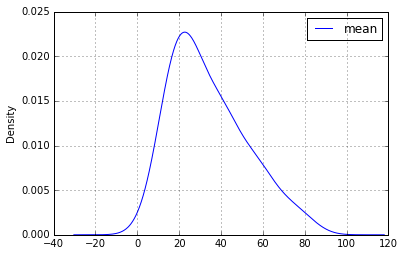

In [59]:
# Plot the distribution of mean(sumMean) across genotypes
df.plot(kind='kde')